# TP Programmation avec Keras - Cas MNIST, fonctionnalités avancées

Nous allons produire un réseau de neurones pour effectuer une classification sur le cas MNIST avec les bibliothèques keras/tensorflow. MNIST est une base de données composée d'images de chiffres. Nous allons mettre en place ici des fonctionnalités un peu plus avancées, liées à la régularisation, batchnormalisation, au jeu de validation, early stopping...

Dans ce TP, des cellules seront laissées à trous, il faudra les compléter suivant les consignes. Elles seront identifiées par le mot **Exercice**. Les **Vérifications** seront effectuées principalement par vous-mêmes, sur la bonne convergence des algorithmes ou leur bon fonctionnement.

Ci-dessous, on importe les bibliothèques qui seront utiles.

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras

## Mise en place des données

Le code ci-dessous charge les données MNIST.

In [58]:
#NE PAS MODIFIER

(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

**Exercice** : Normalisez les données d'entrées en les divisant par 255 et passez les données de sortie sous forme catégorielle (one hot encoding, en utilisant keras.utils.to_categorical)

In [59]:
X_train = X_train/255

X_test = X_test/255

Y_train_cat = keras.utils.to_categorical(Y_train,num_classes = 10)

Y_test_cat = keras.utils.to_categorical(Y_test,num_classes = 10)

**Exercice** : Nous allons utiliser des couches de convolution à deux dimensions. Ce type de couche attend en entrée des données de taille $n\times m \times c$, où $n$ et $m$ sont la taille de l'image, et $c$ correspond au nombre de canaux, il faut donc 3 dimensions au total. Par exemple, une image en couleurs RGB est composée de 3 canaux ($c = 3$). Dans le cas de MNIST, les images sont en niveaux de gris, donc composées d'un seul canal. Cependant, la dimension des images de X_train est (28,28) soit deux dimensions, et il faudrait lui ajouter une dimension pour qu'il y ait le bon nombre de dimensions.

Ci-dessous, effectuez cette correction grâce à la fonction np.expand_dims, en ajoutant une dimension sur le dernier axe (mot-clé axis = 3).

In [60]:
X_train = np.expand_dims(X_train,axis = 3)

X_test = np.expand_dims(X_test,axis = 3)

## Modèle Keras

### Création du modèle avec convolution

**Exercice** : Créez un modèle avec Keras que vous appellerez "my_model".

**Instructions spécifiques** : 
- Les premières couches devront être des couches de convolution 2D : keras.layers.Conv2D. En argument, indiquez le nombre de neurones (ou de filtres), quelques-uns devraient suffire, pas la peine d'en mettre des dizaines. Puis, il faut préciser la taille des filtres : quelques pixels seront suffisants. Vous pouvez mettre la taille sous la forme (n,m) si vous souhaitez des filtres rectangulaires ou juste n si vous voulez des filtres carrés. Enfin, vous pouvez aussi préciser une fonction d'activation (de type "relu".
- La toute première couche de convolution doit comporter l'input_shape. Attention : on a ajouté une dimension.
- Faites suivre chaque couche de convolution d'une couche de MaxPooling2D (keras.layers.MaxPooling2D) pour réduire la taille de l'image. Indiquez en argument la taille du pooling (en général 2 est une valeur par défaut).
- Ne mettez que quelques couches de convolution (2 ou 3 devraient suffire).
- A la suite de la partie convolutive, applatissez la réponse grâce à une couche de Flatten, sans argument.
- Ensuite, vous pouvez remettre des couches Dense pour compléter le réseau, et finir par une dernière couche avec le nombre de neurones et la fonction d'activation adaptée.
- Vous pouvez ajouter des couches de BatchNormalization, Dropout et de la régularisation si vous le souhaitez.

In [61]:
my_model = keras.Sequential()
my_model.add(keras.layers.Conv2D(4,5,input_shape = (28,28,1),activation = "relu"))
my_model.add(keras.layers.BatchNormalization())
my_model.add(keras.layers.MaxPooling2D(2))

my_model.add(keras.layers.Conv2D(4,5,activation = "relu"))
my_model.add(keras.layers.BatchNormalization())
my_model.add(keras.layers.MaxPooling2D(2))

my_model.add(keras.layers.Flatten()) 

my_model.add(keras.layers.Dense(128,activation = "relu", kernel_regularizer = keras.regularizers.l2(0.01)))
my_model.add(keras.layers.Dropout(0.1))
my_model.add(keras.layers.BatchNormalization())

my_model.add(keras.layers.Dense(128,activation = "relu", kernel_regularizer = keras.regularizers.l2(0.01)))
my_model.add(keras.layers.Dropout(0.1))
my_model.add(keras.layers.BatchNormalization())

my_model.add(keras.layers.Dense(10,activation = "softmax", kernel_regularizer = keras.regularizers.l2(0.01)))


**Exercice** : Affichez la structure de votre modèle avec my_model.summary()

In [62]:
my_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 4)         104       
_________________________________________________________________
batch_normalization_26 (Batc (None, 24, 24, 4)         16        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 4)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 4)           404       
_________________________________________________________________
batch_normalization_27 (Batc (None, 8, 8, 4)           16        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 4)           0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 64)              

**Vérification** : Pour l'instant, il suffit qu'il n'y ait pas d'erreur.

### Compilation du modèle

**Exercice** : Compilez le modèle avec l'optimizer que vous souhaitez. Mettez une loss function adaptée ainsi qu'une métrique adaptée.

In [63]:
opt = keras.optimizers.Adam(lr = 0.01)
my_model.compile(optimizer = opt, loss = "categorical_crossentropy",metrics = ["categorical_accuracy"])

**Vérification** : De nouveau, s'il n'y a pas d'erreur et que vous avez suivi les instructions, tout devrait bien se passer.

### Mise en place de l'early stopping

**Exercice** : Définissez un early-stopping.

In [1]:
early_stopping = keras.callbacks.EarlyStopping(monitor = "val_loss",patience = 10,restore_best_weights=True)

NameError: name 'keras' is not defined

## L'apprentissage

**Exercice** : Effectuez l'apprentissage avec un jeu de validation, des mini-batchs, l'early-stopping... et stockez l'historique dans une variable.

In [65]:
learning = my_model.fit(X_train,Y_train_cat,epochs = 100, batch_size = 128,validation_split = 0.1,callbacks = [early_stopping])

Epoch 1/100
422/422 [==============================] - 11s 27ms/step - loss: 0.6751 - categorical_accuracy: 0.9222 - val_loss: 0.4488 - val_categorical_accuracy: 0.9522
Epoch 2/100
422/422 [==============================] - 11s 27ms/step - loss: 0.4592 - categorical_accuracy: 0.9424 - val_loss: 0.3878 - val_categorical_accuracy: 0.9628
Epoch 3/100
422/422 [==============================] - 11s 27ms/step - loss: 0.4209 - categorical_accuracy: 0.9479 - val_loss: 0.3341 - val_categorical_accuracy: 0.9680
Epoch 4/100
422/422 [==============================] - 11s 26ms/step - loss: 0.4119 - categorical_accuracy: 0.9489 - val_loss: 0.3401 - val_categorical_accuracy: 0.9703
Epoch 5/100
422/422 [==============================] - 11s 26ms/step - loss: 0.3854 - categorical_accuracy: 0.9514 - val_loss: 0.3308 - val_categorical_accuracy: 0.9640
Epoch 6/100
422/422 [==============================] - 11s 26ms/step - loss: 0.3638 - categorical_accuracy: 0.9528 - val_loss: 0.3133 - val_categorical_acc

KeyboardInterrupt: 

**Vérification** : La loss function devrait diminuer et l'accuracy augmenter. De même pour le jeu de validation.

**Exercice** : Tracez l'évolution de la fonction de coût et de l'accuracy pour le jeu d'entraînement et pour le jeu de validation.

Text(0.5, 1.0, 'Categorical accuracy evolution')

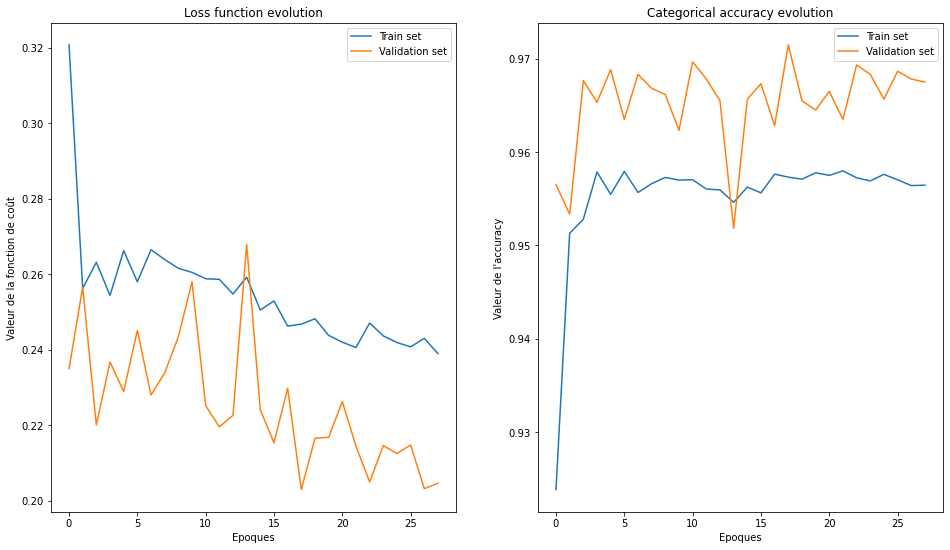

In [66]:
loss_evolution = learning.history["loss"]
acc_evolution = learning.history["categorical_accuracy"]
val_loss_evolution = learning.history["val_loss"]
val_acc_evolution = learning.history["val_categorical_accuracy"]


plt.figure(figsize = (16,9))
plt.subplot(121)
plt.plot(loss_evolution,label = "Train set")
plt.plot(val_loss_evolution,label = "Validation set")
plt.xlabel("Epoques")
plt.ylabel("Valeur de la fonction de coût")
plt.legend()
plt.title("Loss function evolution")

plt.subplot(122)
plt.plot(acc_evolution, label = "Train set")
plt.plot(val_acc_evolution, label = "Validation set")
plt.xlabel("Epoques")
plt.ylabel("Valeur de l'accuracy")
plt.legend()
plt.title("Categorical accuracy evolution")

## Prédictions avec le modèle

**Exercice** : Effectuez la prédiction sur le jeu de test.

In [67]:
Y_pred_test = my_model.predict(X_test)

**Exercice** : Extrayez les labels prédits par votre réseau, qui correspondent aux classes avec la plus grande probabilité. La fonction np.argmax vous sera utile, à appliquer sur le bon "axis".

In [68]:
Y_test_pred_lab = np.argmax(Y_pred_test,axis = 1)

**Exercice** : Calculez l'accuracy sur le jeu de test.

In [69]:
np.sum(Y_test_pred_lab == Y_test)/Y_test.shape[0]

0.9702

Le code ci-dessous vous permet de visualiser quelques résultats pris au hasard sur la base de test.

In [70]:
r = np.random.randint(X_test.shape[0])

figure = plt.figure(figsize = (16,9))

ax1 = plt.subplot(121)
ax1.imshow(X_test[r,:,:,0],cmap = "hot")
plt.title("Prédiction du réseau : " + str(Y_test_pred_lab[r]) + "\n Vraie valeur : " + str(Y_test[r]))

ax2 = plt.subplot(122)
ax2.bar(np.arange(10),height = Y_pred_test[r],tick_label = np.arange(10))
plt.xlabel("Valeur")
plt.ylabel("Output du réseau")


Text(0, 0.5, 'Output du réseau')

**Exercice** : Réutilisez le code d'affichage ci-dessus, mais pour afficher aléatoirement des erreurs. La fonction np.where vous sera utile pour localiser les erreurs.

In [71]:
erreurs = np.where(Y_test_pred_lab != Y_test)[0]

r2 = np.random.randint(erreurs.shape[0])
r = erreurs[r2]

figure = plt.figure(figsize = (16,9))

ax1 = plt.subplot(121)
ax1.imshow(X_test[r,:,:,0],cmap = "hot")
plt.title("Prédiction du réseau : " + str(Y_test_pred_lab[r]) + "\n Vraie valeur : " + str(Y_test[r]))

ax2 = plt.subplot(122)
ax2.bar(np.arange(10),height = Y_pred_test[r],tick_label = np.arange(10))
plt.xlabel("Valeur")
plt.ylabel("Output du réseau")

Text(0, 0.5, 'Output du réseau')